In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

# Example 1 - Bitcoin Price Since Inception

In [2]:
df_bitcoin = pd.read_csv('coindesk-bpi-USD-close_data-2010-07-17_2017-12-06.csv')
df_bitcoin.head()

,Date,Close Price
0,2010-07-18 00:00:00,0.09
1,2010-07-19 00:00:00,0.08
2,2010-07-20 00:00:00,0.07
3,2010-07-21 00:00:00,0.08
4,2010-07-22 00:00:00,0.05


In [3]:
# rename columns. Date = 'ds', Dependent variable = 'y'
df_bitcoin.rename(columns={'Date': 'ds', 'Close Price': 'y'}, inplace=True)
df_bitcoin.head()

,ds,y
0,2010-07-18 00:00:00,0.09
1,2010-07-19 00:00:00,0.08
2,2010-07-20 00:00:00,0.07
3,2010-07-21 00:00:00,0.08
4,2010-07-22 00:00:00,0.05


In [4]:
# create the Prophet model
m_bitcoin = Prophet()
m_bitcoin.fit(df_bitcoin)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
# create a future dataframe
future = m_bitcoin.make_future_dataframe(periods=365)
future.tail()

,ds
3059,2018-12-02 19:01:00
3060,2018-12-03 19:01:00
3061,2018-12-04 19:01:00
3062,2018-12-05 19:01:00
3063,2018-12-06 19:01:00


In [6]:
# make a forecast

forecast = m_bitcoin.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3059,2018-12-02 19:01:00,9119.488847,8169.032185,10038.284581
3060,2018-12-03 19:01:00,9111.071499,8159.640360,9954.813494
3061,2018-12-04 19:01:00,9080.160889,8141.640773,10025.343165
3062,2018-12-05 19:01:00,9079.559177,8216.040233,10047.341124
3063,2018-12-06 19:01:00,9039.274217,8102.603513,9947.581908


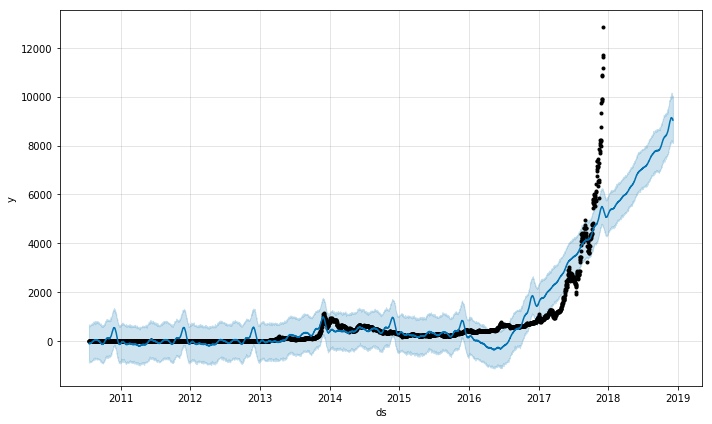

In [8]:
m_bitcoin.plot(forecast)

## This is a terrible forecast...

# Example 2 - Daily page views for the Wikipedia page for Peyton Manning

In [15]:
# link: https://facebook.github.io/prophet/docs/quick_start.html

df = pd.read_csv('example_wp_peyton_manning.csv')
df['y'] = np.log(df['y']) # log transform y
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [10]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.209074,7.418537,8.870551
3266,2017-01-16,8.534139,7.820244,9.249024
3267,2017-01-17,8.321541,7.566368,9.014080
3268,2017-01-18,8.154138,7.443265,8.876050
3269,2017-01-19,8.166091,7.438361,8.918150


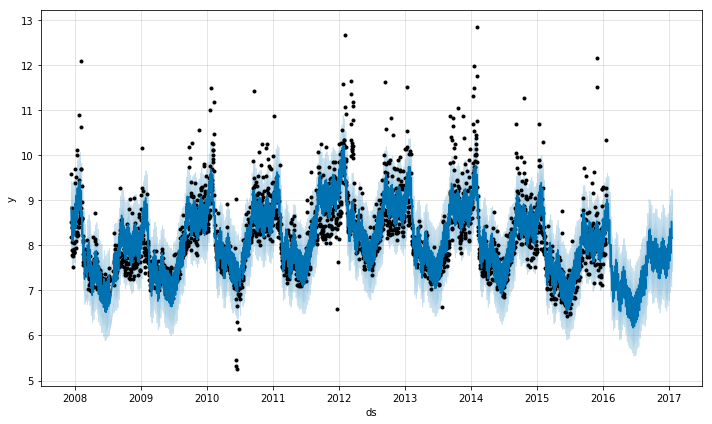

In [13]:
m.plot(forecast)

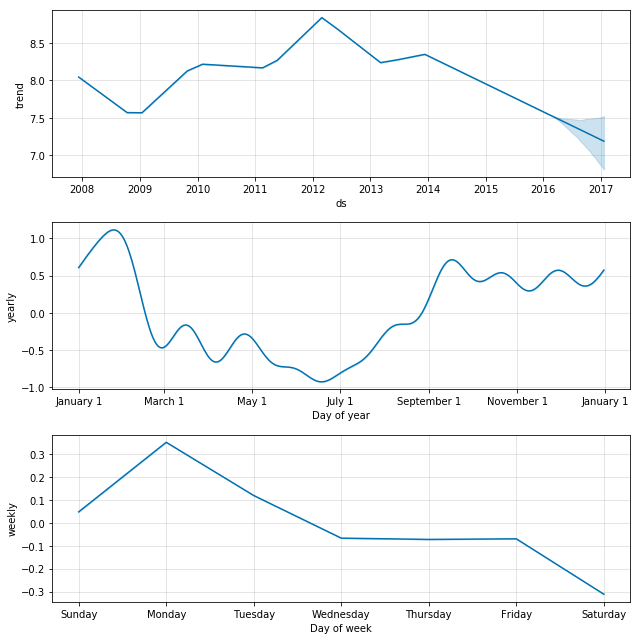

In [14]:
m.plot_components(forecast)